In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/facial/training.csv')

In [3]:
df.shape

(7049, 31)

## 얼굴 기울기 찾기

### 이미지 96x96으로 바꾸고 x,y 데이터 나눔

In [4]:
from joblib import Parallel, delayed

def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype = np.uint8).reshape(96,96)

with Parallel(n_jobs = 10, verbose = 1, prefer = 'threads') as ex:
    x = ex(delayed(format_img)(e) for e in df.Image)

x = np.stack(x)[:,:,:,None]
print(x.shape)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.4s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    6.9s
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:    9.1s
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:   11.5s
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:   15.4s
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:   18.9s


(7049, 96, 96, 1)


[Parallel(n_jobs=10)]: Done 7049 out of 7049 | elapsed:   22.0s finished


In [5]:
y = df.iloc[:,:-1].values
y.shape

(7049, 30)

In [6]:
x.shape

(7049, 96, 96, 1)

814


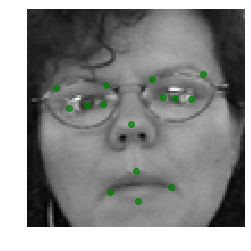

In [7]:
# 이미지 보여주는 function
def show(x, y=None):

    plt.imshow(x[:,:,0], 'gray')
    if y is not None:
        # vertical stack 
        points = np.stack(np.split(y, 15, axis = 0),axis =0).T
        plt.plot(points[0], points[1],'o', color = 'green', alpha = 0.7 )
    plt.axis('off')
sample_idx = np.random.choice(len(x))
show(x[sample_idx], y[sample_idx])
print(sample_idx)

In [8]:
df.loc[6720,:]

left_eye_center_x                                                      69.7602
left_eye_center_y                                                      39.8065
right_eye_center_x                                                     37.4787
right_eye_center_y                                                     37.3233
left_eye_inner_corner_x                                                    NaN
left_eye_inner_corner_y                                                    NaN
left_eye_outer_corner_x                                                    NaN
left_eye_outer_corner_y                                                    NaN
right_eye_inner_corner_x                                                   NaN
right_eye_inner_corner_y                                                   NaN
right_eye_outer_corner_x                                                   NaN
right_eye_outer_corner_y                                                   NaN
left_eyebrow_inner_end_x                            

### y 데이터 (눈, 눈썹, 코, 입)를 x,y좌표로 합친 array로

In [9]:
df.iloc[:,:-1].head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774


In [10]:
def xy_to_list(data):
    xy_list = []
    for d in data:
        xy_list.append(np.split(d, 15))
    return xy_list

In [11]:
xy_list = xy_to_list(y)
print("len(xy_list) : {}\nlen(xy_list[0]) : {}\nxy_list[0][0].shape : {} "
      .format(len(xy_list),len(xy_list[0]), xy_list[0][0].shape ))
display(xy_list[0])

len(xy_list) : 7049
len(xy_list[0]) : 15
xy_list[0][0].shape : (2,) 


[array([66.03356391, 39.00227368]),
 array([30.22700752, 36.4216782 ]),
 array([59.58207519, 39.64742256]),
 array([73.13034586, 39.96999699]),
 array([36.35657143, 37.3894015 ]),
 array([23.45287218, 37.3894015 ]),
 array([56.95326316, 29.03364812]),
 array([80.22712782, 32.22813835]),
 array([40.22760902, 29.0023218 ]),
 array([16.35637895, 29.64747068]),
 array([44.42057143, 57.06680301]),
 array([61.19530827, 79.97016541]),
 array([28.61449624, 77.38899248]),
 array([43.3126015 , 72.93545865]),
 array([43.13070677, 84.48577444])]

In [12]:
xy_list[0]

[array([66.03356391, 39.00227368]),
 array([30.22700752, 36.4216782 ]),
 array([59.58207519, 39.64742256]),
 array([73.13034586, 39.96999699]),
 array([36.35657143, 37.3894015 ]),
 array([23.45287218, 37.3894015 ]),
 array([56.95326316, 29.03364812]),
 array([80.22712782, 32.22813835]),
 array([40.22760902, 29.0023218 ]),
 array([16.35637895, 29.64747068]),
 array([44.42057143, 57.06680301]),
 array([61.19530827, 79.97016541]),
 array([28.61449624, 77.38899248]),
 array([43.3126015 , 72.93545865]),
 array([43.13070677, 84.48577444])]

In [13]:
xy_list[0][10]

array([44.42057143, 57.06680301])

In [14]:
df.loc[0,:]

left_eye_center_x                                                      66.0336
left_eye_center_y                                                      39.0023
right_eye_center_x                                                      30.227
right_eye_center_y                                                     36.4217
left_eye_inner_corner_x                                                59.5821
left_eye_inner_corner_y                                                39.6474
left_eye_outer_corner_x                                                73.1303
left_eye_outer_corner_y                                                  39.97
right_eye_inner_corner_x                                               36.3566
right_eye_inner_corner_y                                               37.3894
right_eye_outer_corner_x                                               23.4529
right_eye_outer_corner_y                                               37.3894
left_eyebrow_inner_end_x                            

### 왼쪽 눈 중앙과 오른쪽 눈 중앙의 중점과 기울기를 구함

In [15]:
import math 
# 두 점간의 기울기와 중점 구함
def get_gradient_middle(feature1, feature2):
    # 사진은 좌우 대칭이기 때문에 왼쪽 - 오른쪽
    delta_x = (feature2 - feature1)[0]
    delta_y = (feature2 - feature1)[1]
    gradient = delta_y / delta_x
#   distance = math.sqrt(math.pow(delta_x,2) + math.pow(delta_y,2))
    middle_point = get_middlepoint(feature1, feature2)
    return gradient, middle_point
# 두 점의 중점 구하기
def get_middlepoint(feature1, feature2):
    return (feature1 + feature2)/2

# 기울기와 좌표값으로 y절편 구하기
def get_b(gradient, point):
    return point[1] - gradient*point[0]

# 어떤 직선의 중점을 지나고 직교하는 직선 구하기
def get_ppline(gradient):
    if gradient == 0:
        perpen_gradient = 0
    else :
        perpen_gradient = (-1/gradient)
    return np.float64(perpen_gradient)

# 눈 사이 직선에 직교하고 중점을 지나는 직선과 코 사이의 x 변화량
def get_nose_ppline_delta_x(middle_point, gradient, nose_point):
    perpen_gradient = get_ppline(gradient)
    if gradient == 0:
        perpen_line_x_point = middle_point[0]
    else:
        b = get_b(perpen_gradient, middle_point)
        perpen_line_x_point = (nose_point[1] - b)/perpen_gradient
    # b = y - ax 
    # y = ax  + b 
    # x = (y-b)/a
    return abs(nose_point[0] - perpen_line_x_point)

In [16]:
# 직교하는 직선들을 이미지에 표시
def show_ppline(x, y=None, line=None):
    # x,y 범위 지정
    plt.xlim(96,0)
    plt.ylim(96,0)
    plt.imshow(x[:,:,0], 'gray')
    if y is not None:
        # vertical stack 
        points = np.stack(np.split(y, 15, axis = 0),axis =0).T
        plt.plot(points[0], points[1],'o', color = 'green', alpha = 0.7 )
    if line is not None:
        x = range(0,96)
        # pipline[0] 은 gradient
        # pipline[1] 은 (x,y)
        # y = ax + b
        plt.plot(x, line[0]*x + get_b(line[0], line[1]), 'r', label='ppline', alpha = 0.7)
        x = range(0,96)
        ppline_gradient = get_ppline(line[0])
        if ppline_gradient == 0:
            plt.plot(np.array([line[1][0]]*96), x, 'r', label='ppline', alpha = 0.7)
        else:
            plt.plot(x, ppline_gradient*x + get_b(ppline_gradient, line[1]), 'r', label='ppline', alpha = 0.7)

    plt.axis('off')

In [17]:
print(xy_list[0][0])
print(xy_list[0][1])

[66.03356391 39.00227368]
[30.22700752 36.4216782 ]


In [18]:
# 두 점 간의 기울기와 중점을 구함
eye_gd_dis = []
for i in range(len(xy_list)):
    eye_gd_dis.append(get_gradient_middle(xy_list[i][1],xy_list[i][0]))
print(len(eye_gd_dis))
print(eye_gd_dis[0])

7049
(0.07207047392439651, array([48.13028571, 37.71197594]))


In [19]:
### xy_list[:][0] 은 왼쪽 눈 center
### xy_list[:][1] 은 오른쪽 눈 center
### xy_list[:][10] 은 코 

In [20]:
gd_md_delta_list = []
for i in range(len(xy_list)):
    # 기울기와 중점
    gd_md_list = list(get_gradient_middle(xy_list[i][1], xy_list[i][0]))
    # 코와 눈 사이 직선간의 거리
    gd_md_list.append(get_nose_ppline_delta_x(gd_md_list[1], gd_md_list[0], xy_list[i][10]))
    gd_md_delta_list.append(gd_md_list)
    gd_md_list.append(i)
print(len(gd_md_delta_list))
print(gd_md_delta_list[0])


7049
[0.07207047392439651, array([48.13028571, 37.71197594]), 2.3148027262097415, 0]


In [21]:
# 눈 사이 중점
print(gd_md_delta_list[5][1])
# 코의 위치
print(xy_list[5][10])

[49.43214953 38.76605607]
[52.46848598 58.8       ]


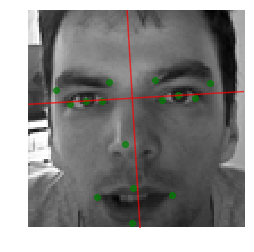

In [22]:
show_ppline(x[5], y[5], gd_md_delta_list[5])

In [23]:
test_list = gd_md_delta_list[:]

In [24]:
test_list[0][2]

2.3148027262097415

In [25]:
test_list.sort(key = lambda x:x[2], reverse = True)

In [26]:
display(test_list[1])

[0.1289572013203705,
 array([48.47271837, 37.88419215]),
 15.103981116811326,
 1776]

In [27]:
gd_md_delta_list[0]

[0.07207047392439651, array([48.13028571, 37.71197594]), 2.3148027262097415, 0]

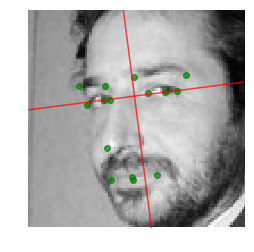

In [28]:
show_ppline(x[1776], y[1776], test_list[1])

In [29]:
# sample_idx = np.random.choice(len(x))
# show(x[sample_idx], y[sample_idx])

## 결측 값 채우기

### 결측 값을 채우는 학습모델 만들기
- feature map
    - 왼쪽 눈 위치
    - 오른쪽 눈 위치
    - 코 위치
    - 아랫입술 위치
    - 추가해야할 feature
        - 눈사이의 기울기
        - 왼쪽 눈과 코사이의 기울기
        - 오른쪽 눈과 코사이의 기울기
        - 입술에서 코까지의 거리
        - 각 눈의 점과 코의 점을 잇는 삼각형 넓이

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed
import math

In [34]:
df = pd.read_csv('../data/facial/training.csv')
df.shape

(7049, 31)

#### 결측값 없는 온전한 데이터 전처리

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/facial/training.csv')
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(7049, 31)
(2140, 31)


In [62]:
feature_list = [0,1,2,3,20,21,28,29]
x_data = df.iloc[:,feature_list]
print("x_data.shape : {}".format(x_data.shape))
for c in x_data.columns:
    print(c)

x_data.shape : (2140, 8)
left_eye_center_x
left_eye_center_y
right_eye_center_x
right_eye_center_y
nose_tip_x
nose_tip_y
mouth_center_bottom_lip_x
mouth_center_bottom_lip_y


In [63]:
y_data = df.drop(x_data.columns ,axis = 1)
y_data.drop('Image', axis = 1, inplace = True)
print("y_data.sahpe : {}".format(y_data.shape))
for c in y_data.columns:
    print(c)

y_data.sahpe : (2140, 22)
left_eye_inner_corner_x
left_eye_inner_corner_y
left_eye_outer_corner_x
left_eye_outer_corner_y
right_eye_inner_corner_x
right_eye_inner_corner_y
right_eye_outer_corner_x
right_eye_outer_corner_y
left_eyebrow_inner_end_x
left_eyebrow_inner_end_y
left_eyebrow_outer_end_x
left_eyebrow_outer_end_y
right_eyebrow_inner_end_x
right_eyebrow_inner_end_y
right_eyebrow_outer_end_x
right_eyebrow_outer_end_y
mouth_left_corner_x
mouth_left_corner_y
mouth_right_corner_x
mouth_right_corner_y
mouth_center_top_lip_x
mouth_center_top_lip_y


#### feautre map을 추가시키기
- 눈 사이 기울기
- 왼쪽눈과 코 사이의 기울기
- 오른쪽눈과 코 사이의 기울기
- 코와 입 사이의 거리
- 각 눈의 점과 코의 점을 잇는 삼각형 넓이

In [64]:
x_data_split = np.split(x_data.values, 4, axis = 1)
# 0 : 왼쪽 눈 1 : 오른쪽 눈 2 : 코 3 : 입술 아래
x_data_split[0].shape

(2140, 2)

In [65]:
x_data.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,44.420571,57.066803,43.130707,84.485774


In [66]:
def get_gradient(feature1, feature2):
    x_delta = (feature1-feature2)[:,0]
    y_delta = (feature1-feature2)[:,1]
    return np.round((y_delta / x_delta), 5)

def get_distnace(feature1, feature2):
    x_delta = (feature1-feature2)[:,0]
    y_delta = (feature1-feature2)[:,1]
    
    return np.round(np.sqrt(np.square(x_delta)+np.square(y_delta)), 5)

In [67]:
# 0 : 왼쪽 눈 1 : 오른쪽 눈 2 : 코 3 : 입술 아래
le2re_gradient = get_gradient(x_data_split[0], x_data_split[1]).reshape(-1, 1)
le2n_gradient = get_gradient(x_data_split[0], x_data_split[2]).reshape(-1, 1)
re2ne_gradient = get_gradient(x_data_split[1], x_data_split[2]).reshape(-1, 1)
n2bm_distnace = get_distnace(x_data_split[2], x_data_split[3]).reshape(-1, 1)

print(le2re_gradient.shape)
print(le2n_gradient.shape)
print(re2ne_gradient.shape)
print(n2bm_distnace.shape)

for d in [le2re_gradient, le2n_gradient,re2ne_gradient,n2bm_distnace]:
    x_data = np.append(x_data, d, axis = 1)
print(x_data.shape)

(2140, 1)
(2140, 1)
(2140, 1)
(2140, 1)
(2140, 12)


In [98]:
#show(img_data[np.argmin(n2bm_distnace)], x_data[np.argmin(n2bm_distnace)], 8)

In [80]:
le2re_gradient

array([[ 0.07207],
       [ 0.04425],
       [ 0.     ],
       ...,
       [ 0.02618],
       [-0.27392],
       [-0.11408]])

In [68]:
from joblib import Parallel, delayed

def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype = np.uint8).reshape(96,96)

with Parallel(n_jobs = 10, verbose = 1, prefer = 'threads') as ex:
    img_data = ex(delayed(format_img)(e) for e in df.Image)

img_data = np.stack(img_data)[:,:,:,None]
print(img_data.shape)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.6s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.2s


(2140, 96, 96, 1)


[Parallel(n_jobs=10)]: Done 2140 out of 2140 | elapsed:    6.2s finished


#### train / test split

In [69]:
from sklearn.model_selection import train_test_split

# random_state는 난수시드
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.2, random_state = 42)
img_train, img_test = train_test_split(img_data,test_size = 0.2, random_state = 42)
print("x_train.shape :{}\nx_val.shape : {}".format(x_train.shape, x_test.shape))
print("y_train.shape :{}\ny_val.shape : {}".format(y_train.shape, y_test.shape))
print("img_train.shape :{}\nimg_val.shape : {}".format(img_train.shape, img_test.shape))

x_train.shape :(1712, 12)
x_val.shape : (428, 12)
y_train.shape :(1712, 22)
y_val.shape : (428, 22)
img_train.shape :(1712, 96, 96, 1)
img_val.shape : (428, 96, 96, 1)


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [ ]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

#### x,y좌표로 변환

In [12]:
def convert_xy(data, feature_size):
    data = data[:,:feature_size]
    # (batch, feature_size/2 , 2-D shape)
    return np.stack(np.split(test, feature_size/2, axis = 1), axis = 1)
    

#### 이미지 보여주는 function

1304


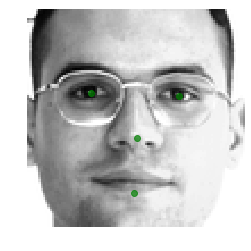

In [72]:
# 이미지 보여주는 function
def show(x, y=None, feature_size = None):

    plt.imshow(x[:,:,0], 'gray')
    if y is not None:
        # vertical stack 
        y = y[:feature_size]
        points = np.stack(np.split(y, int(feature_size/2), axis = 0),axis =0).T
        plt.plot(points[0], points[1],'o', color = 'green', alpha = 0.7 )
    plt.axis('off')
sample_idx = np.random.choice(len(x_data))
show(img_data[sample_idx], x_data[sample_idx], 8)
print(sample_idx)

#### NN model 만들기

In [134]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPool2D
from keras.optimizers import Adam
from keras import regularizers
import numpy as np
from keras.models import load_model
from keras.callbacks import CSVLogger
from keras.callbacks import ReduceLROnPlateau
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf


In [108]:
x_origin_train = x_train_norm[:,:8]
x_origin_test = x_test_norm[:,:8]

In [126]:
x_origin_train = x_train[:,:8]
x_origin_test = x_test[:,:8]

In [217]:
class NNmodel:
    def __init__(self, x_train, x_test, y_train, y_test, epoch):
        
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.epoch = epoch
        self.build_model()
        
    def build_model(self):
        self.model = Sequential()
        self.model.add(Dense(128, input_shape = (12,), kernel_initializer='he_normal',
                             use_bias=True, bias_initializer='he_normal',
                             kernel_regularizer=regularizers.l2(0.01)))
        self.model.add(BatchNormalization(axis=-1))
        self.model.add(Activation('relu'))
#        self.model.add(Dropout(0.5))
        self.model.add(Dense(256, kernel_initializer='he_normal',
                             use_bias=True, bias_initializer='he_normal',
                             kernel_regularizer=regularizers.l2(0.01)))
        self.model.add(BatchNormalization(axis=-1))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(84, kernel_initializer='he_normal',
                             use_bias=True, bias_initializer='he_normal',
                             kernel_regularizer=regularizers.l2(0.01)))
        self.model.add(BatchNormalization(axis=-1))
        self.model.add(Activation('relu'))
#        self.model.add(Dropout(0.5))
        self.model.add(Dense(22, kernel_initializer='he_normal',
                             use_bias=True, bias_initializer='he_normal',
                             kernel_regularizer=regularizers.l2(0.01)))
        self.model.compile(optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), loss='mse', metrics = ['mae'])
        print(self.model.summary())
        print(self.model.input, self.model.output)
    def training_model(self, file_name):
        csv_logger = CSVLogger(file_name+ '.log', separator=',', append=True)
        #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

        self.log = self.model.fit(self.x_train, self.y_train, epochs=self.epoch, batch_size=50, validation_data=[self.x_test, self.y_test], callbacks=[csv_logger])
        self.model.save(file_name + '.h5')



In [23]:
def show_results(*logs):
    trn_loss, val_loss, trn_acc, val_acc = [],[],[],[]
    
    for log in logs:
        trn_loss += log.history['loss']
        val_loss += log.history['val_loss']
        
    fig, ax = plt.subplots(figsize = (8,4))
    # loss value
    ax.plot(trn_loss, label = 'train')
    # accuracy
    ax.plot(val_loss, label = 'validation')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend()

In [157]:
nnmodel_ori1 = NNmodel(x_origin_train, x_origin_test, y_train, y_test, 1000)
nnmodel_ori1.training_model('origin_data_model')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 128)               1152      
_________________________________________________________________
batch_normalization_57 (Batc (None, 128)               512       
_________________________________________________________________
activation_57 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_58 (Batc (None, 256)               1024      
_________________________________________________________________
activation_58 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 84)                21588     
__________

1712/1712 [==============================] - 0s 262us/step - loss: 11.9690 - mean_absolute_error: 1.4677 - val_loss: 15.0876 - val_mean_absolute_error: 2.0329
Epoch 85/1000
1712/1712 [==============================] - 0s 262us/step - loss: 11.9568 - mean_absolute_error: 1.4729 - val_loss: 14.3783 - val_mean_absolute_error: 1.9586
Epoch 86/1000
1712/1712 [==============================] - 0s 249us/step - loss: 11.8657 - mean_absolute_error: 1.4617 - val_loss: 13.9000 - val_mean_absolute_error: 1.8671
Epoch 87/1000
1712/1712 [==============================] - 0s 252us/step - loss: 11.8674 - mean_absolute_error: 1.4756 - val_loss: 14.1412 - val_mean_absolute_error: 1.9352
Epoch 88/1000
1712/1712 [==============================] - 0s 269us/step - loss: 11.7212 - mean_absolute_error: 1.4585 - val_loss: 14.8379 - val_mean_absolute_error: 2.0556
Epoch 89/1000
1712/1712 [==============================] - 0s 263us/step - loss: 11.7077 - mean_absolute_error: 1.4689 - val_loss: 14.6435 - val_mean

1712/1712 [==============================] - 0s 260us/step - loss: 7.8977 - mean_absolute_error: 1.3423 - val_loss: 9.5835 - val_mean_absolute_error: 1.6953
Epoch 179/1000
1712/1712 [==============================] - 0s 261us/step - loss: 8.0592 - mean_absolute_error: 1.3836 - val_loss: 10.4692 - val_mean_absolute_error: 1.8174
Epoch 180/1000
1712/1712 [==============================] - 0s 270us/step - loss: 8.0956 - mean_absolute_error: 1.3903 - val_loss: 8.5813 - val_mean_absolute_error: 1.4736
Epoch 181/1000
1712/1712 [==============================] - 0s 253us/step - loss: 8.0097 - mean_absolute_error: 1.3699 - val_loss: 11.3422 - val_mean_absolute_error: 1.9277
Epoch 182/1000
1712/1712 [==============================] - 0s 277us/step - loss: 8.0303 - mean_absolute_error: 1.3816 - val_loss: 14.1826 - val_mean_absolute_error: 2.4683
Epoch 183/1000
1712/1712 [==============================] - 1s 293us/step - loss: 7.9507 - mean_absolute_error: 1.3685 - val_loss: 10.0415 - val_mean_ab

1712/1712 [==============================] - 0s 251us/step - loss: 6.1577 - mean_absolute_error: 1.3140 - val_loss: 23.4853 - val_mean_absolute_error: 3.2976
Epoch 273/1000
1712/1712 [==============================] - 0s 258us/step - loss: 6.0782 - mean_absolute_error: 1.2924 - val_loss: 15.1046 - val_mean_absolute_error: 2.5462
Epoch 274/1000
1712/1712 [==============================] - 0s 262us/step - loss: 6.0046 - mean_absolute_error: 1.2850 - val_loss: 9.4702 - val_mean_absolute_error: 1.8305
Epoch 275/1000
1712/1712 [==============================] - 0s 252us/step - loss: 6.1352 - mean_absolute_error: 1.3183 - val_loss: 10.1059 - val_mean_absolute_error: 2.0959
Epoch 276/1000
1712/1712 [==============================] - 0s 265us/step - loss: 6.1566 - mean_absolute_error: 1.3264 - val_loss: 9.0020 - val_mean_absolute_error: 1.8161
Epoch 277/1000
1712/1712 [==============================] - 0s 265us/step - loss: 6.0840 - mean_absolute_error: 1.3126 - val_loss: 19.8737 - val_mean_ab

1712/1712 [==============================] - 0s 256us/step - loss: 5.2789 - mean_absolute_error: 1.2893 - val_loss: 12.1194 - val_mean_absolute_error: 2.4335
Epoch 367/1000
1712/1712 [==============================] - 0s 248us/step - loss: 5.3471 - mean_absolute_error: 1.3065 - val_loss: 19.5368 - val_mean_absolute_error: 2.9513
Epoch 368/1000
1712/1712 [==============================] - 0s 251us/step - loss: 5.3518 - mean_absolute_error: 1.3089 - val_loss: 10.1714 - val_mean_absolute_error: 2.0785
Epoch 369/1000
1712/1712 [==============================] - 0s 252us/step - loss: 5.1890 - mean_absolute_error: 1.2705 - val_loss: 9.4206 - val_mean_absolute_error: 1.9953
Epoch 370/1000
1712/1712 [==============================] - 0s 251us/step - loss: 5.1602 - mean_absolute_error: 1.2686 - val_loss: 9.4382 - val_mean_absolute_error: 1.8725
Epoch 371/1000
1712/1712 [==============================] - 0s 281us/step - loss: 5.2157 - mean_absolute_error: 1.2786 - val_loss: 8.1344 - val_mean_abs

1712/1712 [==============================] - 0s 252us/step - loss: 4.6512 - mean_absolute_error: 1.2480 - val_loss: 10.5269 - val_mean_absolute_error: 2.2456
Epoch 461/1000
1712/1712 [==============================] - 0s 248us/step - loss: 4.7062 - mean_absolute_error: 1.2534 - val_loss: 12.0950 - val_mean_absolute_error: 2.3755
Epoch 462/1000
1712/1712 [==============================] - 0s 253us/step - loss: 4.6796 - mean_absolute_error: 1.2544 - val_loss: 9.5115 - val_mean_absolute_error: 2.0957
Epoch 463/1000
1712/1712 [==============================] - 0s 251us/step - loss: 4.5787 - mean_absolute_error: 1.2308 - val_loss: 10.8829 - val_mean_absolute_error: 2.3170
Epoch 464/1000
1712/1712 [==============================] - 0s 267us/step - loss: 4.6703 - mean_absolute_error: 1.2517 - val_loss: 9.0307 - val_mean_absolute_error: 1.9971
Epoch 465/1000
1712/1712 [==============================] - 0s 258us/step - loss: 4.5606 - mean_absolute_error: 1.2229 - val_loss: 9.1142 - val_mean_abs

1712/1712 [==============================] - 0s 248us/step - loss: 4.3949 - mean_absolute_error: 1.2396 - val_loss: 7.6367 - val_mean_absolute_error: 1.8285
Epoch 555/1000
1712/1712 [==============================] - 0s 266us/step - loss: 4.2138 - mean_absolute_error: 1.2008 - val_loss: 10.2773 - val_mean_absolute_error: 2.2293
Epoch 556/1000
1712/1712 [==============================] - 0s 252us/step - loss: 4.3280 - mean_absolute_error: 1.2266 - val_loss: 8.9338 - val_mean_absolute_error: 2.0696
Epoch 557/1000
1712/1712 [==============================] - 0s 251us/step - loss: 4.2112 - mean_absolute_error: 1.2048 - val_loss: 12.0214 - val_mean_absolute_error: 2.3483
Epoch 558/1000
1712/1712 [==============================] - 0s 248us/step - loss: 4.1960 - mean_absolute_error: 1.2004 - val_loss: 7.0857 - val_mean_absolute_error: 1.6747
Epoch 559/1000
1712/1712 [==============================] - 0s 263us/step - loss: 4.2047 - mean_absolute_error: 1.2005 - val_loss: 10.5970 - val_mean_abs

1712/1712 [==============================] - 1s 293us/step - loss: 3.9599 - mean_absolute_error: 1.1812 - val_loss: 11.0320 - val_mean_absolute_error: 2.3396
Epoch 649/1000
1712/1712 [==============================] - 0s 269us/step - loss: 3.9079 - mean_absolute_error: 1.1770 - val_loss: 9.3391 - val_mean_absolute_error: 2.0789
Epoch 650/1000
1712/1712 [==============================] - 0s 251us/step - loss: 3.9204 - mean_absolute_error: 1.1768 - val_loss: 7.2214 - val_mean_absolute_error: 1.7867
Epoch 651/1000
1712/1712 [==============================] - 0s 251us/step - loss: 3.9755 - mean_absolute_error: 1.1939 - val_loss: 10.8340 - val_mean_absolute_error: 2.4442
Epoch 652/1000
1712/1712 [==============================] - 0s 285us/step - loss: 3.9929 - mean_absolute_error: 1.1973 - val_loss: 11.3177 - val_mean_absolute_error: 2.4813
Epoch 653/1000
1712/1712 [==============================] - 1s 304us/step - loss: 3.9894 - mean_absolute_error: 1.1921 - val_loss: 8.5728 - val_mean_abs

1712/1712 [==============================] - 0s 264us/step - loss: 3.8051 - mean_absolute_error: 1.1835 - val_loss: 8.1740 - val_mean_absolute_error: 1.8774
Epoch 743/1000
1712/1712 [==============================] - 0s 266us/step - loss: 3.8565 - mean_absolute_error: 1.1927 - val_loss: 7.8070 - val_mean_absolute_error: 1.9156
Epoch 744/1000
1712/1712 [==============================] - 0s 281us/step - loss: 3.9292 - mean_absolute_error: 1.2168 - val_loss: 8.3088 - val_mean_absolute_error: 1.9204
Epoch 745/1000
1712/1712 [==============================] - 0s 259us/step - loss: 3.8438 - mean_absolute_error: 1.1871 - val_loss: 8.2810 - val_mean_absolute_error: 1.9886
Epoch 746/1000
1712/1712 [==============================] - 0s 269us/step - loss: 3.8663 - mean_absolute_error: 1.1950 - val_loss: 8.4287 - val_mean_absolute_error: 2.0302
Epoch 747/1000
1712/1712 [==============================] - 0s 271us/step - loss: 3.8491 - mean_absolute_error: 1.1939 - val_loss: 10.4462 - val_mean_absol

Epoch 836/1000
1712/1712 [==============================] - 0s 251us/step - loss: 3.6986 - mean_absolute_error: 1.1821 - val_loss: 10.1966 - val_mean_absolute_error: 2.2371
Epoch 837/1000
1712/1712 [==============================] - ETA: 0s - loss: 3.6405 - mean_absolute_error: 1.170 - 0s 273us/step - loss: 3.6655 - mean_absolute_error: 1.1747 - val_loss: 9.8714 - val_mean_absolute_error: 2.1531
Epoch 838/1000
1712/1712 [==============================] - 0s 291us/step - loss: 3.7571 - mean_absolute_error: 1.1969 - val_loss: 7.1992 - val_mean_absolute_error: 1.8074
Epoch 839/1000
1712/1712 [==============================] - 0s 263us/step - loss: 3.6984 - mean_absolute_error: 1.1796 - val_loss: 8.0534 - val_mean_absolute_error: 1.9521
Epoch 840/1000
1712/1712 [==============================] - 0s 258us/step - loss: 3.6432 - mean_absolute_error: 1.1757 - val_loss: 7.5305 - val_mean_absolute_error: 1.9126
Epoch 841/1000
1712/1712 [==============================] - 0s 268us/step - loss: 3.5

1712/1712 [==============================] - 0s 261us/step - loss: 3.4695 - mean_absolute_error: 1.1471 - val_loss: 8.9604 - val_mean_absolute_error: 2.1259
Epoch 931/1000
1712/1712 [==============================] - 0s 254us/step - loss: 3.4910 - mean_absolute_error: 1.1526 - val_loss: 12.1194 - val_mean_absolute_error: 2.4591
Epoch 932/1000
1712/1712 [==============================] - 0s 254us/step - loss: 3.5257 - mean_absolute_error: 1.1618 - val_loss: 9.0890 - val_mean_absolute_error: 2.1339
Epoch 933/1000
1712/1712 [==============================] - 0s 256us/step - loss: 3.5052 - mean_absolute_error: 1.1592 - val_loss: 9.7591 - val_mean_absolute_error: 2.2114
Epoch 934/1000
1712/1712 [==============================] - 0s 272us/step - loss: 3.5157 - mean_absolute_error: 1.1602 - val_loss: 9.3998 - val_mean_absolute_error: 2.1521
Epoch 935/1000
1712/1712 [==============================] - 0s 256us/step - loss: 3.5429 - mean_absolute_error: 1.1635 - val_loss: 11.8514 - val_mean_abso

In [181]:
sum(nnmodel_ori1.log.history['loss'][-10:])/10

3.482762161008666

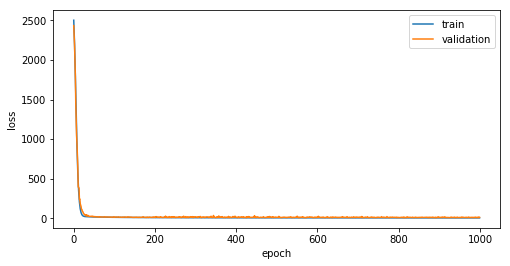

In [158]:
show_results(nnmodel_ori1.log)

In [218]:
nnmodel2 = NNmodel(x_train, x_test, y_train, y_test, 1000)
nnmodel2.training_model('add_feature_model')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 128)               1664      
_________________________________________________________________
batch_normalization_63 (Batc (None, 128)               512       
_________________________________________________________________
activation_63 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_64 (Batc (None, 256)               1024      
_________________________________________________________________
activation_64 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 256)               0         
__________

1712/1712 [==============================] - 0s 266us/step - loss: 14.4069 - mean_absolute_error: 1.8757 - val_loss: 17.7283 - val_mean_absolute_error: 2.4537
Epoch 84/1000
1712/1712 [==============================] - 0s 256us/step - loss: 14.4211 - mean_absolute_error: 1.8838 - val_loss: 16.9352 - val_mean_absolute_error: 2.3039
Epoch 85/1000
1712/1712 [==============================] - 0s 255us/step - loss: 14.4546 - mean_absolute_error: 1.8962 - val_loss: 13.8598 - val_mean_absolute_error: 1.8214
Epoch 86/1000
1712/1712 [==============================] - 0s 270us/step - loss: 14.4228 - mean_absolute_error: 1.8906 - val_loss: 15.8041 - val_mean_absolute_error: 2.2309
Epoch 87/1000
1712/1712 [==============================] - 0s 275us/step - loss: 14.2561 - mean_absolute_error: 1.8683 - val_loss: 13.4819 - val_mean_absolute_error: 1.7430
Epoch 88/1000
1712/1712 [==============================] - 0s 269us/step - loss: 14.0201 - mean_absolute_error: 1.8393 - val_loss: 15.8352 - val_mean

1712/1712 [==============================] - 0s 264us/step - loss: 10.1620 - mean_absolute_error: 1.7249 - val_loss: 11.1055 - val_mean_absolute_error: 1.8606
Epoch 178/1000
1712/1712 [==============================] - 0s 268us/step - loss: 10.2896 - mean_absolute_error: 1.7353 - val_loss: 13.1501 - val_mean_absolute_error: 2.2353
Epoch 179/1000
1712/1712 [==============================] - 0s 270us/step - loss: 10.1470 - mean_absolute_error: 1.7205 - val_loss: 18.1835 - val_mean_absolute_error: 2.7234
Epoch 180/1000
1712/1712 [==============================] - 0s 282us/step - loss: 10.1482 - mean_absolute_error: 1.7296 - val_loss: 23.0516 - val_mean_absolute_error: 3.1746
Epoch 181/1000
1712/1712 [==============================] - 0s 268us/step - loss: 10.5046 - mean_absolute_error: 1.7896 - val_loss: 17.0870 - val_mean_absolute_error: 2.5607
Epoch 182/1000
1712/1712 [==============================] - 0s 265us/step - loss: 10.3374 - mean_absolute_error: 1.7570 - val_loss: 30.1517 - val

1712/1712 [==============================] - 0s 265us/step - loss: 8.3685 - mean_absolute_error: 1.6690 - val_loss: 8.4862 - val_mean_absolute_error: 1.6952
Epoch 272/1000
1712/1712 [==============================] - 0s 277us/step - loss: 8.2006 - mean_absolute_error: 1.6485 - val_loss: 10.0658 - val_mean_absolute_error: 2.0149
Epoch 273/1000
1712/1712 [==============================] - 0s 260us/step - loss: 8.1154 - mean_absolute_error: 1.6396 - val_loss: 8.5979 - val_mean_absolute_error: 1.7209
Epoch 274/1000
1712/1712 [==============================] - 0s 259us/step - loss: 8.2607 - mean_absolute_error: 1.6603 - val_loss: 13.8874 - val_mean_absolute_error: 2.5372
Epoch 275/1000
1712/1712 [==============================] - 0s 258us/step - loss: 8.1650 - mean_absolute_error: 1.6441 - val_loss: 10.6999 - val_mean_absolute_error: 1.9996
Epoch 276/1000
1712/1712 [==============================] - 0s 257us/step - loss: 8.2453 - mean_absolute_error: 1.6645 - val_loss: 27.7127 - val_mean_ab

C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.460026). Check your callbacks.
  % delta_t_median)
C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.230513). Check your callbacks.
  % delta_t_median)


1712/1712 [==============================] - 1s 543us/step - loss: 7.6824 - mean_absolute_error: 1.6336 - val_loss: 8.1750 - val_mean_absolute_error: 1.7220
Epoch 319/1000
1712/1712 [==============================] - 0s 261us/step - loss: 7.5078 - mean_absolute_error: 1.6031 - val_loss: 9.6943 - val_mean_absolute_error: 2.0201
Epoch 320/1000
1712/1712 [==============================] - 0s 256us/step - loss: 7.4991 - mean_absolute_error: 1.6051 - val_loss: 15.8234 - val_mean_absolute_error: 2.6133
Epoch 321/1000
1712/1712 [==============================] - 0s 256us/step - loss: 7.4793 - mean_absolute_error: 1.6008 - val_loss: 9.3295 - val_mean_absolute_error: 1.9052
Epoch 322/1000
1712/1712 [==============================] - 0s 255us/step - loss: 7.5706 - mean_absolute_error: 1.6129 - val_loss: 15.5070 - val_mean_absolute_error: 2.6069
Epoch 323/1000
1712/1712 [==============================] - 0s 263us/step - loss: 7.5330 - mean_absolute_error: 1.6117 - val_loss: 14.6920 - val_mean_abs

1712/1712 [==============================] - 0s 273us/step - loss: 6.6858 - mean_absolute_error: 1.5820 - val_loss: 9.2462 - val_mean_absolute_error: 1.8671
Epoch 413/1000
1712/1712 [==============================] - 0s 256us/step - loss: 6.6523 - mean_absolute_error: 1.5673 - val_loss: 13.5093 - val_mean_absolute_error: 2.4489
Epoch 414/1000
1712/1712 [==============================] - 0s 259us/step - loss: 6.7113 - mean_absolute_error: 1.5772 - val_loss: 10.6179 - val_mean_absolute_error: 2.2363
Epoch 415/1000
1712/1712 [==============================] - 0s 253us/step - loss: 6.5758 - mean_absolute_error: 1.5534 - val_loss: 14.6769 - val_mean_absolute_error: 2.5917
Epoch 416/1000
1712/1712 [==============================] - 0s 261us/step - loss: 6.5569 - mean_absolute_error: 1.5502 - val_loss: 8.9834 - val_mean_absolute_error: 1.9775
Epoch 417/1000
1712/1712 [==============================] - 0s 255us/step - loss: 6.4781 - mean_absolute_error: 1.5369 - val_loss: 8.7833 - val_mean_abs

1712/1712 [==============================] - 0s 259us/step - loss: 5.8954 - mean_absolute_error: 1.5025 - val_loss: 8.5708 - val_mean_absolute_error: 1.9771
Epoch 507/1000
1712/1712 [==============================] - 0s 267us/step - loss: 5.7343 - mean_absolute_error: 1.4787 - val_loss: 10.4404 - val_mean_absolute_error: 2.0889
Epoch 508/1000
1712/1712 [==============================] - 0s 269us/step - loss: 5.6884 - mean_absolute_error: 1.4680 - val_loss: 11.2098 - val_mean_absolute_error: 2.1771
Epoch 509/1000
1712/1712 [==============================] - 0s 258us/step - loss: 5.7111 - mean_absolute_error: 1.4736 - val_loss: 9.9895 - val_mean_absolute_error: 2.1349
Epoch 510/1000
1712/1712 [==============================] - 0s 259us/step - loss: 5.6583 - mean_absolute_error: 1.4657 - val_loss: 13.7125 - val_mean_absolute_error: 2.6288
Epoch 511/1000
1712/1712 [==============================] - 0s 257us/step - loss: 5.7108 - mean_absolute_error: 1.4738 - val_loss: 9.6432 - val_mean_abs

Epoch 601/1000
1712/1712 [==============================] - 0s 258us/step - loss: 5.4035 - mean_absolute_error: 1.4659 - val_loss: 8.2219 - val_mean_absolute_error: 2.0390
Epoch 602/1000
1712/1712 [==============================] - 0s 268us/step - loss: 5.2968 - mean_absolute_error: 1.4409 - val_loss: 7.7742 - val_mean_absolute_error: 1.9278
Epoch 603/1000
1712/1712 [==============================] - 0s 258us/step - loss: 5.3355 - mean_absolute_error: 1.4506 - val_loss: 7.6428 - val_mean_absolute_error: 1.8893
Epoch 604/1000
1712/1712 [==============================] - 0s 272us/step - loss: 5.3744 - mean_absolute_error: 1.4658 - val_loss: 9.1475 - val_mean_absolute_error: 2.1315
Epoch 605/1000
1712/1712 [==============================] - 0s 282us/step - loss: 5.2551 - mean_absolute_error: 1.4406 - val_loss: 7.3404 - val_mean_absolute_error: 1.8222
Epoch 606/1000
1712/1712 [==============================] - 0s 270us/step - loss: 5.2432 - mean_absolute_error: 1.4344 - val_loss: 7.4923 - 

1712/1712 [==============================] - 1s 294us/step - loss: 4.8763 - mean_absolute_error: 1.3970 - val_loss: 8.9711 - val_mean_absolute_error: 2.0483
Epoch 696/1000
1712/1712 [==============================] - 0s 267us/step - loss: 5.0421 - mean_absolute_error: 1.4326 - val_loss: 9.2409 - val_mean_absolute_error: 2.1014
Epoch 697/1000
1712/1712 [==============================] - 0s 276us/step - loss: 4.9501 - mean_absolute_error: 1.4095 - val_loss: 6.6584 - val_mean_absolute_error: 1.7560
Epoch 698/1000
1712/1712 [==============================] - 0s 265us/step - loss: 5.0072 - mean_absolute_error: 1.4239 - val_loss: 7.7720 - val_mean_absolute_error: 1.9100
Epoch 699/1000
1712/1712 [==============================] - 0s 262us/step - loss: 4.9162 - mean_absolute_error: 1.4011 - val_loss: 5.9499 - val_mean_absolute_error: 1.5979
Epoch 700/1000
1712/1712 [==============================] - 0s 259us/step - loss: 4.8910 - mean_absolute_error: 1.4101 - val_loss: 6.5278 - val_mean_absolu

Epoch 743/1000
1712/1712 [==============================] - 0s 262us/step - loss: 4.8825 - mean_absolute_error: 1.4152 - val_loss: 8.5898 - val_mean_absolute_error: 2.0727
Epoch 744/1000
1712/1712 [==============================] - 0s 267us/step - loss: 4.7663 - mean_absolute_error: 1.3956 - val_loss: 7.5649 - val_mean_absolute_error: 1.8717
Epoch 745/1000
1712/1712 [==============================] - 0s 279us/step - loss: 4.9107 - mean_absolute_error: 1.4236 - val_loss: 6.5737 - val_mean_absolute_error: 1.7600
Epoch 746/1000
1712/1712 [==============================] - 0s 289us/step - loss: 4.8146 - mean_absolute_error: 1.4048 - val_loss: 6.4584 - val_mean_absolute_error: 1.7272
Epoch 747/1000
1712/1712 [==============================] - 0s 276us/step - loss: 4.7597 - mean_absolute_error: 1.3924 - val_loss: 6.8144 - val_mean_absolute_error: 1.7518
Epoch 748/1000
1712/1712 [==============================] - 0s 273us/step - loss: 4.7459 - mean_absolute_error: 1.3912 - val_loss: 7.9196 - 

Epoch 838/1000
1712/1712 [==============================] - 0s 275us/step - loss: 4.5487 - mean_absolute_error: 1.3657 - val_loss: 6.9526 - val_mean_absolute_error: 1.8334
Epoch 839/1000
1712/1712 [==============================] - 0s 276us/step - loss: 4.4806 - mean_absolute_error: 1.3567 - val_loss: 5.4336 - val_mean_absolute_error: 1.5429
Epoch 840/1000
1712/1712 [==============================] - 0s 274us/step - loss: 4.6268 - mean_absolute_error: 1.3884 - val_loss: 6.7379 - val_mean_absolute_error: 1.8212
Epoch 841/1000
1712/1712 [==============================] - 0s 273us/step - loss: 4.6296 - mean_absolute_error: 1.3807 - val_loss: 6.7353 - val_mean_absolute_error: 1.7722
Epoch 842/1000
1712/1712 [==============================] - 0s 290us/step - loss: 4.6589 - mean_absolute_error: 1.3888 - val_loss: 16.9364 - val_mean_absolute_error: 3.0339
Epoch 843/1000
1712/1712 [==============================] - 0s 280us/step - loss: 4.7555 - mean_absolute_error: 1.4120 - val_loss: 8.1841 -

Epoch 933/1000
1712/1712 [==============================] - 0s 263us/step - loss: 4.4659 - mean_absolute_error: 1.3696 - val_loss: 11.4127 - val_mean_absolute_error: 2.4376
Epoch 934/1000
1712/1712 [==============================] - 0s 255us/step - loss: 4.4518 - mean_absolute_error: 1.3662 - val_loss: 5.3974 - val_mean_absolute_error: 1.5614
Epoch 935/1000
1712/1712 [==============================] - 0s 256us/step - loss: 4.4239 - mean_absolute_error: 1.3578 - val_loss: 7.2091 - val_mean_absolute_error: 1.8145
Epoch 936/1000
1712/1712 [==============================] - 0s 268us/step - loss: 4.3482 - mean_absolute_error: 1.3466 - val_loss: 9.4568 - val_mean_absolute_error: 2.2843
Epoch 937/1000
1712/1712 [==============================] - 0s 259us/step - loss: 4.4426 - mean_absolute_error: 1.3625 - val_loss: 7.0840 - val_mean_absolute_error: 1.8192
Epoch 938/1000
1712/1712 [==============================] - 0s 271us/step - loss: 4.4657 - mean_absolute_error: 1.3679 - val_loss: 9.9244 -

In [180]:
sum(nnmodel2.log.history['loss'][-10:])/10

3.2870034356540607

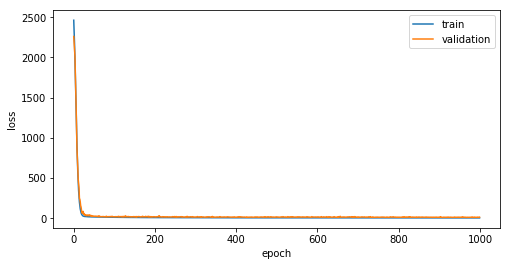

In [161]:
show_results(nnmodel2.log)

### 눈 코 입 있는 이미지만 살리기

In [56]:
 add_feature_model = load_model("./add_feature_model.h5")

In [57]:
df = pd.read_csv('../data/facial/training.csv')

In [58]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

#### 온전한 데이터는 빼고 결측 값있는 것들만 뽑고 학습
- 2140개의 데이터를 뺀 나머지에 대해서 눈코입 있는 이미지만 뽑아냄

In [59]:
# 데이터 온전한 애들
complete_bool = df.notnull().all(axis = 1).values
complete_bool.sum()

2140

In [60]:
uncomplete_bool = np.asarray([not b for b in complete_bool])

In [61]:
uncomplete_bool.sum()

4909

In [62]:
notnull_lefteye = df['left_eye_center_x'].notnull().values
notnull_righteye = df['right_eye_center_x'].notnull().values
notnull_mouth = df['mouth_center_bottom_lip_y'].notnull().values

bool_index = notnull_lefteye*notnull_righteye*notnull_mouth*uncomplete_bool

new_df = df[bool_index]

In [63]:
# 순서가 어긋날 수 있으니 다시 DataFrame을 생성해 index가 초기화될 수 있게한다
new_df = pd.DataFrame(new_df.values, columns= new_df.columns)

In [64]:
feature_list = [0,1,2,3,20,21,28,29]
x_data = new_df.iloc[:,feature_list]
print("x_data.shape : {}".format(x_data.shape))

y_data = new_df.drop(x_data.columns ,axis = 1)
y_data.drop('Image', axis = 1, inplace = True)
print("y_data.sahpe : {}".format(y_data.shape))


x_data.shape : (4860, 8)
y_data.sahpe : (4860, 22)


In [65]:
x_data.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
nose_tip_x                   0
nose_tip_y                   0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [66]:
x_data_split = np.split(x_data.values, 4, axis = 1)
# 0 : 왼쪽 눈 1 : 오른쪽 눈 2 : 코 3 : 입술 아래
x_data_split[0].shape

(4860, 2)

In [67]:
def get_gradient(feature1, feature2):
    x_delta = (feature1-feature2)[:,0].astype(np.float32)
    y_delta = (feature1-feature2)[:,1].astype(np.float32)
    return np.round((y_delta / x_delta), 5)

def get_distnace(feature1, feature2):
    x_delta = (feature1-feature2)[:,0].astype(np.float32)
    y_delta = (feature1-feature2)[:,1].astype(np.float32)
    
    return np.round(np.sqrt(np.square(x_delta)+np.square(y_delta)), 5)

In [68]:
# 0 : 왼쪽 눈 1 : 오른쪽 눈 2 : 코 3 : 입술 아래
le2re_gradient = get_gradient(x_data_split[0], x_data_split[1]).reshape(-1, 1)
le2n_gradient = get_gradient(x_data_split[0], x_data_split[2]).reshape(-1, 1)
re2ne_gradient = get_gradient(x_data_split[1], x_data_split[2]).reshape(-1, 1)
n2bm_distnace = get_distnace(x_data_split[2], x_data_split[3]).reshape(-1, 1)

print(le2re_gradient.shape)
print(le2n_gradient.shape)
print(re2ne_gradient.shape)
print(n2bm_distnace.shape)

for d in [le2re_gradient, le2n_gradient,re2ne_gradient,n2bm_distnace]:
    x_data = np.append(x_data, d, axis = 1)
print(x_data.shape)

(4860, 1)
(4860, 1)
(4860, 1)
(4860, 1)
(4860, 12)


C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [69]:
x_data.dtype

dtype('O')

In [70]:
fill_na_data = add_feature_model.predict(x_data)

In [72]:
fill_na_data.shape

(4860, 22)

#### 결측값들을 채워줌

In [73]:
print(fill_na_data.shape)
print(type(fill_na_data))

(4860, 22)
<class 'numpy.ndarray'>


In [74]:
new_df.iloc[:,4:20]
new_df.iloc[0,22:28]

mouth_left_corner_x       68.0135
mouth_left_corner_y       71.1333
mouth_right_corner_x      36.0251
mouth_right_corner_y       79.185
mouth_center_top_lip_x    54.6252
mouth_center_top_lip_y    75.5648
Name: 0, dtype: object

In [75]:
print(new_df.shape)
print(type(new_df))

(4860, 31)
<class 'pandas.core.frame.DataFrame'>


In [76]:
new_df.iloc[:,4:20] = fill_na_data[:,:16]
new_df.iloc[:,22:28] = fill_na_data[:,16:]

In [77]:
new_df.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

#### 결측 값 채운 것과 원래 다 차 있는 데이터들을 합치고 학습시키도록 함

In [78]:
complete_df = df.loc[complete_bool]

In [79]:
print(new_df.shape)
print(complete_df.shape)

(4860, 31)
(2140, 31)


In [80]:
complete_df= complete_df.append(new_df, ignore_index=True)

In [81]:
print(complete_df.shape)
print(complete_df.columns)

(7000, 31)
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')


#### image를 96 x 96으로 나눠줌

In [82]:
from joblib import Parallel, delayed

def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype = np.uint8).reshape(96,96)

with Parallel(n_jobs = 10, verbose = 1, prefer = 'threads') as ex:
    x = ex(delayed(format_img)(e) for e in complete_df.Image)

x_data_7000 = np.stack(x)[:,:,:,None]
print(x_data_7000.shape)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.4s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    6.7s
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:    8.8s
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:   11.3s
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:   13.9s
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:   16.8s


(7000, 96, 96, 1)


[Parallel(n_jobs=10)]: Done 7000 out of 7000 | elapsed:   19.6s finished


#### train / val로 나누고 정규화시켜줌

In [83]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y_data_7000 = complete_df.iloc[:, :-1]

x_train, x_val, y_train, y_val = train_test_split(x_data_7000,y_data_7000,test_size = 0.2, random_state = 42)
print("x_train.shape :{}\nx_val.shape : {}".format(x_train.shape, x_val.shape))
print("y_train.shape :{}\ny_val.shape : {}".format(y_train.shape, y_val.shape))
scaler = MinMaxScaler()

x_train_norm = x_train[:,:,:,:]
x_val_norm = x_val[:,:,:,:]
x_train_norm = x_train_norm.reshape([-1, 96*96])
x_val_norm = x_val_norm.reshape([-1,96*96])
print("x_train_norm.shape : {}".format(x_train_norm.shape))
print("x_val_norm,.shape : {}".format(x_val_norm.shape))

x_train_norm = scaler.fit_transform(x_train_norm)
x_val_norm = scaler.fit_transform(x_val_norm)
print("x_train_norm.mean : {}".format(x_train_norm.mean()))
print("x_train_norm.std : {}".format(x_train_norm.std()))

x_train.shape :(5600, 96, 96, 1)
x_val.shape : (1400, 96, 96, 1)
y_train.shape :(5600, 30)
y_val.shape : (1400, 30)
x_train_norm.shape : (5600, 9216)
x_val_norm,.shape : (1400, 9216)


C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


x_train_norm.mean : 0.4891743142118889
x_train_norm.std : 0.23215074516512815


In [84]:
x_train_norm = x_train_norm.reshape([-1,96,96,1])
x_val_norm = x_val_norm.reshape([-1,96,96,1])
print("x_train_norm.shape : {}".format(x_train_norm.shape))
print("x_val_norm,.shape : {}".format(x_val_norm.shape))


x_train_norm.shape : (5600, 96, 96, 1)
x_val_norm,.shape : (1400, 96, 96, 1)


In [525]:
np.savez('../data/facial/xy_tdata_7000.npz', xtn = x_train_norm, xvn = x_val_norm, yt = y_train, yv = y_val)

In [526]:
import os
# starts nvdia gpu monitor
# os.startfile(r'C:\Program Files\NVIDIA Corporation\Control Panel Client\NvGpuUtilization.exe')

# was gonna open task-manager as well, 
# but it wouldn't let python continue unless taskmanager is closed
# os.system(r'taskmgr')

"""
+++ RESOURCE MONITOR +++
- cpu monitor (CPUMon)
https://www.downloadcrew.com/article/35114-cpumon
- gpu monitor (GPU-Z)
https://www.techpowerup.com/download/techpowerup-gpu-z/

both are standalone, no installation required.
These monitors are becoming necessary as
OOM (Out Of Memory) seems to be a frequent problem
dealing with neural network, especially so with ensemble
"""

#os.startfile(r'C:/python_ML/Kaggle/data/resource_monitor/CPUMon.exe')
os.startfile(r'C:/python_ML/Kaggle/data/resource_monitor/GPU-Z.2.18.0.exe')

In [ ]:
scaler = joblib.load(scaler_filename) 

In [1]:
import subprocess

cmd = ["python","C:/python_ML/Kaggle/facial_keypoints/FKD_model2_keras.py"]
subprocess.run(cmd)

CompletedProcess(args=['python', 'C:/python_ML/Kaggle/facial_keypoints/FKD_model2_keras.py'], returncode=0)

In [21]:
import pandas as pd

log_data = pd.read_csv("./model1_norm_7000.csv", sep =',', index_col=False)

In [27]:
log_data = log_data.iloc[:, 1:]

In [32]:
log_data.tail(5)

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
95,9.445768,1.612000,9.300027,1.605848
96,9.496279,1.625241,9.917921,1.724392
97,9.437292,1.630939,13.860931,2.174894
98,9.738894,1.653118,9.351179,1.587451
99,9.490102,1.641493,8.349913,1.517538


In [34]:
from keras.models import load_model

final_model = load_model("./model1_norm_7000.h5")

In [38]:
def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype = np.uint8).reshape(96,96)


In [85]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed

test_data = pd.read_csv('../data/facial/test.csv')
lookid_data = pd.read_csv('../data/facial/IdLookupTable.csv')

# test_data 정규화
# scaler.fit_transform()

#def format_img(x):
#    return np.asarray([int(e) for e in x.split(' ')], dtype = np.uint8).reshape(96,96)

# 분산처리 작업
with Parallel(n_jobs=10, verbose=1, prefer ='threads') as ex:
    # Image column을 분리해서 list로 만들고 np.array로 바꿈
    x_test = ex(delayed(format_img)(e) for e in test_data.Image)
x_test = np.stack(x_test)[:,:,:,None]
print(x_test.shape)

x_test = x_test.reshape((-1,96*96))
x_test_norm = scaler.fit_transform(x_test).reshape(-1,96,96,1)
x_test.shape

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.4s
[Parallel(n_jobs=10)]: Done 1783 out of 1783 | elapsed:    4.9s finished
C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(1783, 96, 96, 1)


(1783, 9216)

In [86]:
display(lookid_data.head(3))
lookid_data.shape

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN


(27124, 4)

In [89]:
pred = final_model.predict(x_test_norm)
lookid_list = list(lookid_data['FeatureName'])
imageId = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [90]:
print("pred.shape : {}".format(pred.shape))
print("len(llokid_list) : {}".format(len(lookid_list)))
print("len(imageId) : {}".format(len(imageId)))

pred.shape : (1783, 30)
len(llokid_list) : 27124
len(imageId) : 27124


In [93]:
rowid = lookid_data['RowId']
rowid = list(rowid)

feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

preded = []
for x,y in zip(imageId, feature):
    preded.append(pre_list[x][y])

In [94]:
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded, name = 'Location')

submission = pd.concat([rowid,loc], axis = 1)
submission.to_csv('FKD_submission2.csv', index = False)